In [1]:
import gpflow
import numpy as np
import matplotlib
from gpflow.utilities import print_summary
import tensorflow as tf

# The lines below are specific to the notebook format
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

(-4, 6)

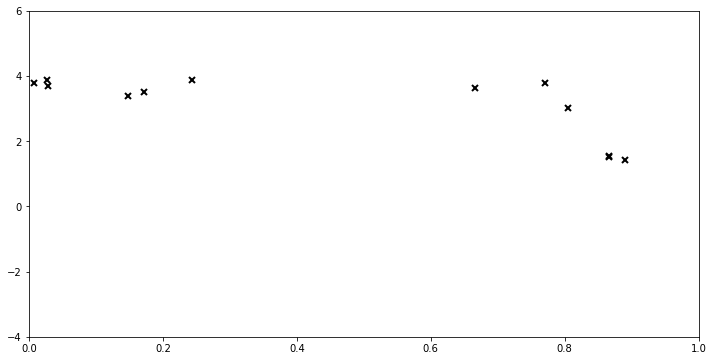

In [2]:
data = np.genfromtxt('data/regression_1D.csv', delimiter=',')
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1].reshape(-1, 1)

plt.plot(X, Y, 'kx', mew=2);
plt.xlim([0,1])
plt.ylim([-4,6])

### Setting which gpu to run on
* TF defaults to using 95% of gpu memory, hence can only have one Python instance per gpu if using default methods

In [3]:
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_visible_devices(physical_devices[0], 'GPU')

In [4]:
#k = gpflow.kernels.Matern52()
k = gpflow.kernels.SquaredExponential()
#k = gpflow.kernels.RationalQuadratic()
#k = gpflow.kernels.Polynomial()
#k = gpflow.kernels.Matern12()


In [5]:
print_summary(k)

name                            class      transform    prior    trainable    shape    dtype      value
------------------------------  ---------  -----------  -------  -----------  -------  -------  -------
SquaredExponential.variance     Parameter  Softplus              True         ()       float64        1
SquaredExponential.lengthscale  Parameter  Softplus              True         ()       float64        1


In [6]:
k.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.5413248546129181>,
 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.5413248546129181>)

In [7]:
m = gpflow.models.GPR(data=(X, Y), kernel=k, mean_function=None)

In [8]:
print_summary(m)

name                     class      transform                prior    trainable    shape    dtype      value
-----------------------  ---------  -----------------------  -------  -----------  -------  -------  -------
GPR.kernel.variance      Parameter  Softplus                          True         ()       float64        1
GPR.kernel.lengthscale   Parameter  Softplus                          True         ()       float64        1
GPR.likelihood.variance  Parameter  Softplus + AffineScalar           True         ()       float64        1


In [9]:
m.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.5413248546129181>,
 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.5413248546129181>,
 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.5413232726357549>)

In [10]:
opt = gpflow.optimizers.Scipy()

In [11]:
def objective_closure():
    return - m.log_marginal_likelihood()

opt_logs = opt.minimize(objective_closure,
                        m.trainable_variables,
                        options=dict(maxiter=100))
print_summary(m)

name                     class      transform                prior    trainable    shape    dtype         value
-----------------------  ---------  -----------------------  -------  -----------  -------  -------  ----------
GPR.kernel.variance      Parameter  Softplus                          True         ()       float64  8.10661
GPR.kernel.lengthscale   Parameter  Softplus                          True         ()       float64  0.129023
GPR.likelihood.variance  Parameter  Softplus + AffineScalar           True         ()       float64  0.00643747


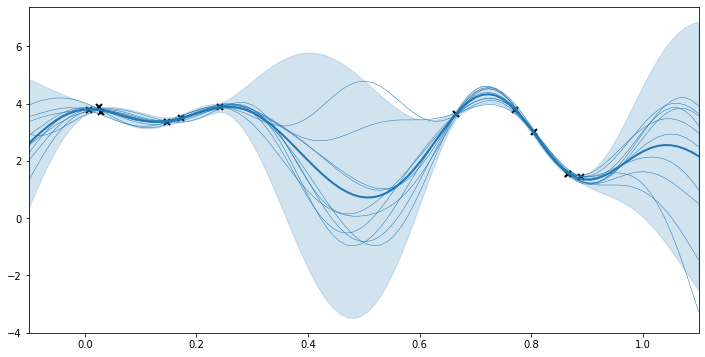

In [12]:
## generate test points for prediction
xx = np.linspace(-0.1, 1.1, 100).reshape(100, 1)  # test points must be of shape (N, D)

## predict mean and variance of latent GP at test points
mean, var = m.predict_f(xx)

## generate 10 samples from posterior
samples = m.predict_f_samples(xx, 10)  # shape (10, 100, 1)

## plot 
plt.figure(figsize=(12, 6))
plt.plot(X, Y, 'kx', mew=2)
plt.plot(xx, mean, 'C0', lw=2)
plt.fill_between(xx[:,0],
                 mean[:,0] - 1.96 * np.sqrt(var[:,0]),
                 mean[:,0] + 1.96 * np.sqrt(var[:,0]),
                 color='C0', alpha=0.2)

plt.plot(xx, samples[:, :, 0].numpy().T, 'C0', linewidth=.5)
plt.xlim(-0.1, 1.1);


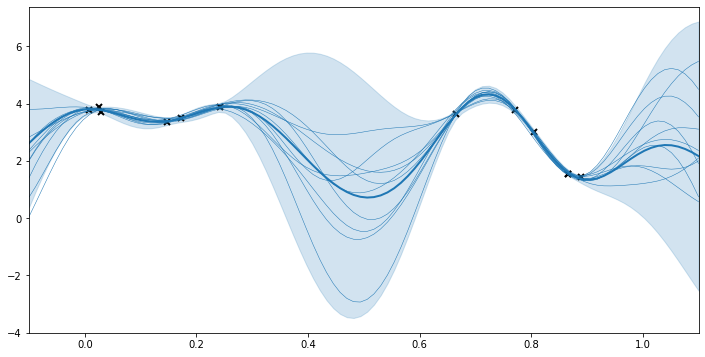

In [13]:
## generate test points for prediction
xx = np.linspace(-0.1, 1.1, 100).reshape(100, 1)  # test points must be of shape (N, D)

## predict mean and variance of latent GP at test points
mean, var = m.predict_f(xx)

## generate 10 samples from posterior
samples = m.predict_f_samples(xx, 10)  # shape (10, 100, 1)

## plot 
plt.figure(figsize=(12, 6))
plt.plot(X, Y, 'kx', mew=2)
plt.plot(xx, mean, 'C0', lw=2)
plt.fill_between(xx[:,0],
                 mean[:,0] - 1.96 * np.sqrt(var[:,0]),
                 mean[:,0] + 1.96 * np.sqrt(var[:,0]),
                 color='C0', alpha=0.2)

plt.plot(xx, samples[:, :, 0].numpy().T, 'C0', linewidth=.5)
plt.xlim(-0.1, 1.1);


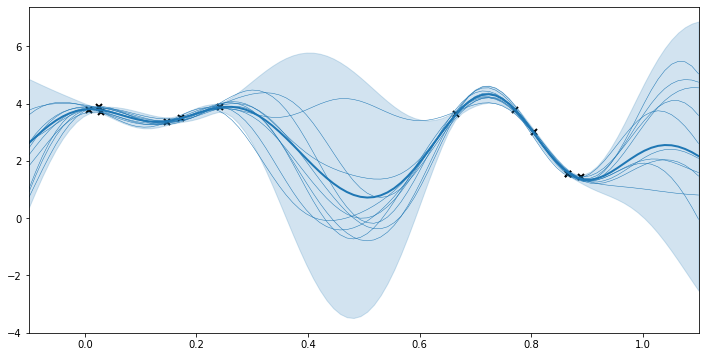

In [14]:
## generate test points for prediction
xx = np.linspace(-0.1, 1.1, 100).reshape(100, 1)  # test points must be of shape (N, D)

## predict mean and variance of latent GP at test points
mean, var = m.predict_f(xx)

## generate 10 samples from posterior
samples = m.predict_f_samples(xx, 10)  # shape (10, 100, 1)

## plot 
plt.figure(figsize=(12, 6))
plt.plot(X, Y, 'kx', mew=2)
plt.plot(xx, mean, 'C0', lw=2)
plt.fill_between(xx[:,0],
                 mean[:,0] - 1.96 * np.sqrt(var[:,0]),
                 mean[:,0] + 1.96 * np.sqrt(var[:,0]),
                 color='C0', alpha=0.2)

plt.plot(xx, samples[:, :, 0].numpy().T, 'C0', linewidth=.5)
plt.xlim(-0.1, 1.1);


## Standardized data

In [15]:
X_standardized = (X - X.mean())/X.std()
Y_standardized = (Y - Y.mean())/Y.std()

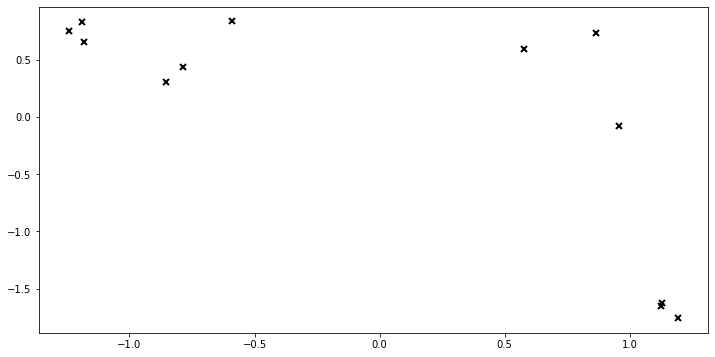

In [16]:
plt.plot(X_standardized, Y_standardized, 'kx', mew=2);
# plt.xlim([0,1])
# plt.ylim([-4,6])

In [17]:
k_std = gpflow.kernels.Matern52()
print_summary(k_std)

name                  class      transform    prior    trainable    shape    dtype      value
--------------------  ---------  -----------  -------  -----------  -------  -------  -------
Matern52.variance     Parameter  Softplus              True         ()       float64        1
Matern52.lengthscale  Parameter  Softplus              True         ()       float64        1


In [18]:
m_std = gpflow.models.GPR(data=(X_standardized, Y_standardized), kernel=k_std, mean_function=None)
print_summary(m_std)

name                     class      transform                prior    trainable    shape    dtype      value
-----------------------  ---------  -----------------------  -------  -----------  -------  -------  -------
GPR.kernel.variance      Parameter  Softplus                          True         ()       float64        1
GPR.kernel.lengthscale   Parameter  Softplus                          True         ()       float64        1
GPR.likelihood.variance  Parameter  Softplus + AffineScalar           True         ()       float64        1


In [19]:
m_std.likelihood.variance.assign(0.01)
m_std.kernel.lengthscale.assign(0.3)
print_summary(m_std)

name                     class      transform                prior    trainable    shape    dtype      value
-----------------------  ---------  -----------------------  -------  -----------  -------  -------  -------
GPR.kernel.variance      Parameter  Softplus                          True         ()       float64     1
GPR.kernel.lengthscale   Parameter  Softplus                          True         ()       float64     0.3
GPR.likelihood.variance  Parameter  Softplus + AffineScalar           True         ()       float64     0.01


In [20]:
opt = gpflow.optimizers.Scipy()

def objective_closure():
    return - m_std.log_marginal_likelihood()

opt_logs = opt.minimize(objective_closure,
                        m_std.trainable_variables,
                        options=dict(maxiter=100))
print_summary(m_std)

name                     class      transform                prior    trainable    shape    dtype         value
-----------------------  ---------  -----------------------  -------  -----------  -------  -------  ----------
GPR.kernel.variance      Parameter  Softplus                          True         ()       float64  0.918824
GPR.kernel.lengthscale   Parameter  Softplus                          True         ()       float64  0.289878
GPR.likelihood.variance  Parameter  Softplus + AffineScalar           True         ()       float64  0.00556262


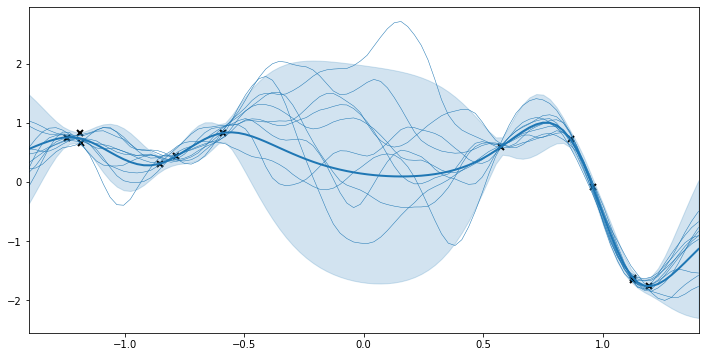

In [21]:
## generate test points for prediction
xx = np.linspace(-1.4, 1.4, 100).reshape(100, 1)  # test points must be of shape (N, D)

## predict mean and variance of latent GP at test points
mean, var = m_std.predict_f(xx)

## generate 10 samples from posterior
samples = m_std.predict_f_samples(xx, 10)  # shape (10, 100, 1)

## plot 
plt.figure(figsize=(12, 6))
plt.plot(X_standardized, Y_standardized, 'kx', mew=2)
plt.plot(xx, mean, 'C0', lw=2)
plt.fill_between(xx[:,0],
                 mean[:,0] - 1.96 * np.sqrt(var[:,0]),
                 mean[:,0] + 1.96 * np.sqrt(var[:,0]),
                 color='C0', alpha=0.2)

plt.plot(xx, samples[:, :, 0].numpy().T, 'C0', linewidth=.5)
plt.xlim(-1.4, 1.4);


In [22]:
samples[:, :, 0].numpy().shape

(10, 100)

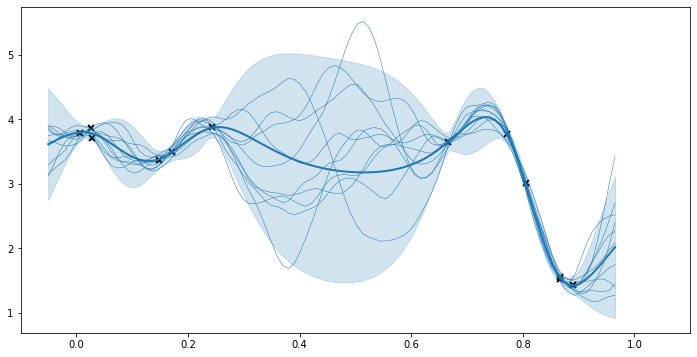

In [23]:
## generate test points for prediction
xx = np.linspace(-1.4, 1.4, 100).reshape(100, 1)  # test points must be of shape (N, D)

## predict mean and variance of latent GP at test points
mean, var = m_std.predict_f(xx)

## generate 10 samples from posterior
samples = m_std.predict_f_samples(xx, 10)  # shape (10, 100, 1)

## plot 
plt.figure(figsize=(12, 6))
plt.plot(X_standardized*X.std()+X.mean(), Y_standardized*Y.std()+Y.mean(), 'kx', mew=2)
plt.plot(xx*X.std()+X.mean(), mean*Y.std()+Y.mean(), 'C0', lw=2)
plt.fill_between(xx[:,0]*X.std()+X.mean(),
                 (mean[:,0] - 1.96 * np.sqrt(var[:,0]))*Y.std()+Y.mean(),
                 (mean[:,0] + 1.96 * np.sqrt(var[:,0]))*Y.std()+Y.mean(),
                 color='C0', alpha=0.2)

plt.plot(xx*X.std()+X.mean(), samples[:, :, 0].numpy().T*Y.std()+Y.mean(), 'C0', linewidth=.5)
plt.xlim(-0.1, 1.1);


In [117]:
print_summary(m)

name                     class      transform                prior    trainable    shape    dtype        value
-----------------------  ---------  -----------------------  -------  -----------  -------  -------  ---------
GPR.kernel.variance      Parameter  Softplus                          True         ()       float64  7.96581
GPR.kernel.lengthscale   Parameter  Softplus                          True         ()       float64  0.212416
GPR.likelihood.variance  Parameter  Softplus + AffineScalar           True         ()       float64  0.0057594


In [118]:
print_summary(m_std)

name                     class      transform                prior    trainable    shape    dtype         value
-----------------------  ---------  -----------------------  -------  -----------  -------  -------  ----------
GPR.kernel.variance      Parameter  Softplus                          True         ()       float64  0.918824
GPR.kernel.lengthscale   Parameter  Softplus                          True         ()       float64  0.289878
GPR.likelihood.variance  Parameter  Softplus + AffineScalar           True         ()       float64  0.00556262
